At the end of the experiment:
* Classify fruits data using KNN

#### Importing the required packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def labels_converter(s):
    s = s.lower()
    if s == "orange":
        return 0
    if s == "apple":
        return 1
    return -1

#### Loading the data

In [ ]:
data = pd.read_csv("fruits_weight_sphercity.csv",converters={"labels":labels_converter})

In [ ]:
data.head()

,Color,Weight,Sphericity,labels
0,Red,200,0.40,1
1,Orange,320,1.00,0
2,Orange,310,0.95,0
3,Red,220,0.45,1
4,Red,230,0.50,1


In [ ]:
data1 = data[0:60:3] # Considering only 20 samples
#data1= data
data1.head()

,Color,Weight,Sphericity,labels
0,Red,200,0.40,1
3,Red,220,0.45,1
6,Red,240,0.35,1
9,Red,243,0.53,1
12,Green,259,0.42,1


#### Checking for length of the dataset

In [ ]:
print(len(data))
print(len(data1))

69
20


In [ ]:
train = data1 # Considering 20 samples as train set
print(type(train))
test = data[1:50:10] # Considering 5 samples for testing
print(test) 
print(len(test))

<class 'pandas.core.frame.DataFrame'>
     Color  Weight  Sphericity  labels
1   Orange     320        1.00       0
11   Green     255        0.60       1
21   Green     220        0.33       1
31   Green     255        0.69       0
41     Red     200        0.48       1
5


### Applying KNN Classifier on the data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
neigh = KNeighborsClassifier(n_neighbors=k,metric="euclidean", algorithm="brute")

In [ ]:
traindata = train.values[:,1:3] # Converting dataframe to array

In [ ]:
# Training or fitting the model with the train data
neigh.fit(traindata,train.labels)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
test1 = test.values[:,1:3] # Converting dataframe to array

In [ ]:
# Testing the trained model
pred1 = neigh.predict(test1)

In [ ]:
print(pred1,"predictions") #Predictions
print(test.values[:,3],"labels") #labels

[0 1 1 1 1] predictions
[0 1 1 0 1] labels


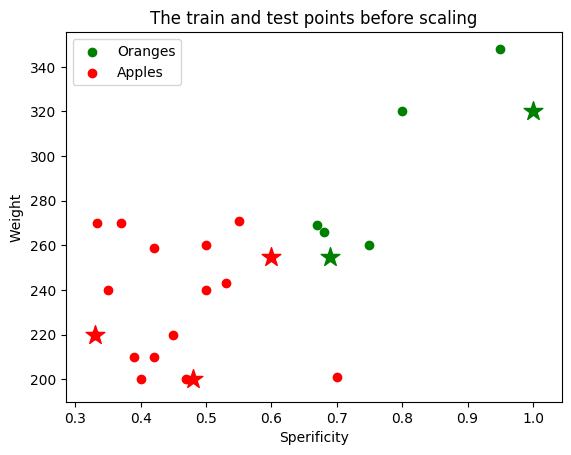

In [ ]:
plt.style.use('default')
oranges = train[train.labels == 0]
apples = train[train.labels == 1]
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="o") # Training data
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="o") # Training data
oranges = test[test.labels == 0]  
apples = test[test.labels == 1]
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="*",s=200) # Testing data
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="*",s=200) #Testing data
plt.xlabel("Sperificity")
plt.ylabel("Weight")
plt.legend(["Oranges", "Apples"])
plt.title("The train and test points before scaling")
plt.show()

In [ ]:
train

,Color,Weight,Sphericity,labels
0,Red,200,0.400,1
3,Red,220,0.450,1
6,Red,240,0.350,1
9,Red,243,0.530,1
12,Green,259,0.420,1
15,Greenish yellow,260,0.750,0
18,Green,266,0.680,0
21,Green,220,0.330,1
24,Red,210,0.390,1
27,Reddish yellow,270,0.333,1


In [ ]:
import numpy as np
pred2 = np.column_stack((test1,pred1.T))
print(pred2)

[[320 1.0 0]
 [255 0.6 1]
 [220 0.33 1]
 [255 0.69 1]
 [200 0.48 1]]


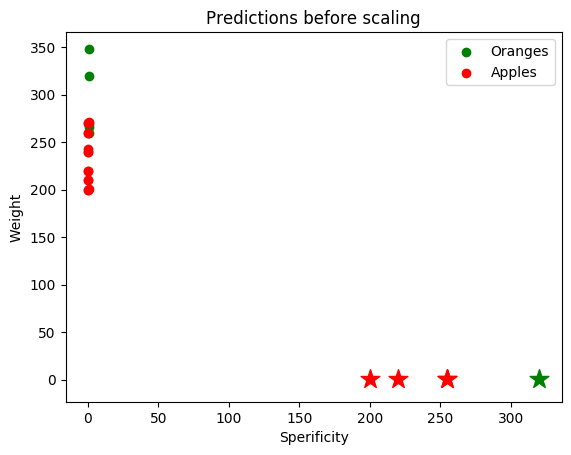

In [ ]:
plt.style.use('default')
oranges = train[train.labels == 0]
apples = train[train.labels == 1]
oranges1 = pred2[pred2[:,2]==0]
apples1 = pred2[pred2[:,2]==1]
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="o")
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="o")
plt.scatter(oranges1[:,0], oranges1[:,1], color="green",marker="*",s=200)
plt.scatter(apples1[:,0], apples1[:,1], color="red",marker="*",s=200)
plt.xlabel("Sperificity")
plt.ylabel("Weight")
plt.legend(["Oranges","Apples"])
plt.title("Predictions before scaling")
plt.show()

## After Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
data.head()

,Color,Weight,Sphericity,labels
0,Red,200,0.40,1
1,Orange,320,1.00,0
2,Orange,310,0.95,0
3,Red,220,0.45,1
4,Red,230,0.50,1


In [ ]:
data[['Sphericity', 'Weight']] = scaler.fit_transform(data[['Sphericity', 'Weight']])

In [ ]:
data.head()

,Color,Weight,Sphericity,labels
0,Red,0.000000,0.333333,1
1,Orange,0.774194,1.000000,0
2,Orange,0.709677,0.944444,0
3,Red,0.129032,0.388889,1
4,Red,0.193548,0.444444,1


### Taking the data samples for training after the interval of  3

In [ ]:
train = data[0:60:3]
print(train)

              Color    Weight  Sphericity  labels
0               Red  0.000000    0.333333       1
3               Red  0.129032    0.388889       1
6               Red  0.258065    0.277778       1
9               Red  0.277419    0.477778       1
12            Green  0.380645    0.355556       1
15  Greenish yellow  0.387097    0.722222       0
18            Green  0.425806    0.644444       0
21            Green  0.129032    0.255556       1
24              Red  0.064516    0.322222       1
27   Reddish yellow  0.451613    0.258889       1
30            Green  0.445161    0.633333       0
33            Green  0.458065    0.500000       1
36            Green  0.451613    0.300000       1
39              Red  0.000000    0.411111       1
42              Red  0.064516    0.355556       1
45           Orange  0.954839    0.944444       0
48              Red  0.258065    0.444444       1
51              Red  0.387097    0.444444       1
54              Red  0.774194    0.777778       0


In [ ]:
#test = data.iloc[[5,15,31,49,57]]
test = data[1:50:10]
print(test)
#print(train)
print(len(test))

     Color    Weight  Sphericity  labels
1   Orange  0.774194    1.000000       0
11   Green  0.354839    0.555556       1
21   Green  0.129032    0.255556       1
31   Green  0.354839    0.655556       0
41     Red  0.000000    0.422222       1
5


#### Apply KNN Classifier on the data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
neigh = KNeighborsClassifier(n_neighbors=k,metric="euclidean", algorithm="brute")

In [ ]:
traindata = train.values[:,1:3]# Converting dataframe into array

In [ ]:
# Training or fitting the model with the train data
neigh.fit(traindata,train.labels)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
test1 = test.values[:,1:3] # Converting dataframe into array

In [ ]:
# Testing the trained model
pred1 = neigh.predict(test1)

In [ ]:
print(pred1,"predictions") #Predictions
print(test.values[:,3],"labels") #labels

[0 1 1 0 1] predictions
[0 1 1 0 1] labels


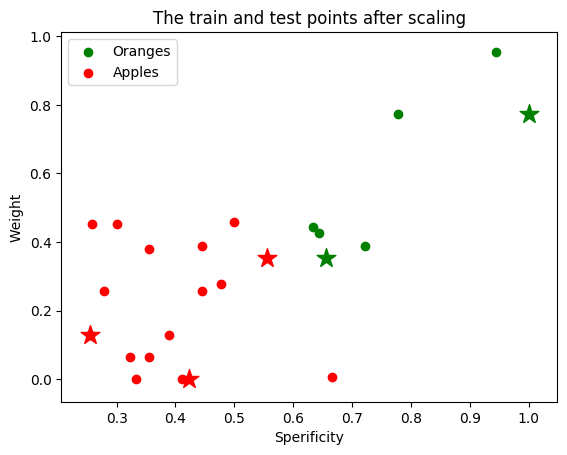

In [ ]:
plt.style.use('default')
oranges = train[train.labels == 0]
apples = train[train.labels == 1]
# Plotting Training data
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="o") 
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="o")
oranges = test[test.labels == 0]
apples = test[test.labels == 1]

# Plotting Testing data
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="*",s=200)
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="*",s=200)
plt.xlabel("Sperificity")
plt.ylabel("Weight")
plt.legend(["Oranges", "Apples"])
plt.title("The train and test points after scaling")
plt.show()

In [ ]:
pred2 = np.column_stack((test1,pred1.T))
print(pred2)

[[0.7741935483870968 1.0 0]
 [0.3548387096774195 0.5555555555555555 1]
 [0.12903225806451624 0.2555555555555556 1]
 [0.3548387096774195 0.6555555555555554 0]
 [0.0 0.4222222222222222 1]]


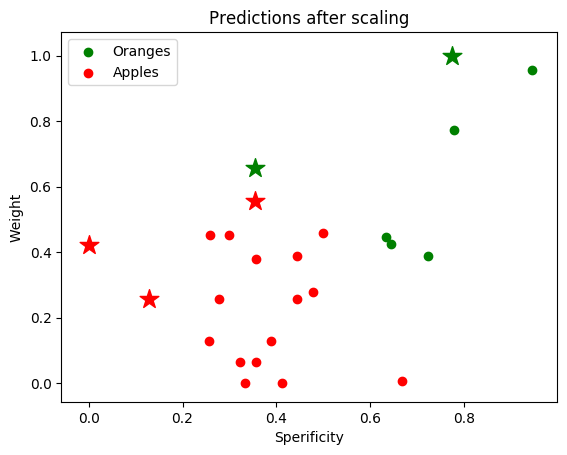

In [ ]:
plt.style.use('default')
oranges = train[train.labels == 0]
apples = train[train.labels == 1]
oranges1 = pred2[pred2[:,2]==0]
apples1 = pred2[pred2[:,2]==1]
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="o")
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="o")
plt.scatter(oranges1[:,0], oranges1[:,1], color="green",marker="*",s=200)
plt.scatter(apples1[:,0], apples1[:,1], color="red",marker="*",s=200)
plt.xlabel("Sperificity")
plt.ylabel("Weight")
plt.legend(["Oranges","Apples"])
plt.title("Predictions after scaling")
plt.show()